# Análisis Exploratorio de Datos - Riesgo Crediticio
## Proyecto: Predicción de Riesgo Crediticio
### 1. Importación de librerías y configuración inicial

In [19]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path
#-----------------------------------------------------------------------------------------------------------------------------
#Añadir el directorio raíz del proyecto al path para poder importar config.py
sys.path.append(str(Path.cwd().parent))
#-----------------------------------------------------------------------------------------------------------------------------
#Importar configuración del proyecto
from src import config
#-----------------------------------------------------------------------------------------------------------------------------
#Configuración de estilo para gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("viridis")
#-----------------------------------------------------------------------------------------------------------------------------
#Diccionario para traducir nombres de columnas a español
nombres_espanol = {
    'checking_status': 'estado_cuenta',
    'duration': 'duracion_meses',
    'credit_history': 'historial_credito',
    'purpose': 'proposito',
    'credit_amount': 'monto_credito',
    'savings_status': 'estado_ahorros',
    'employment': 'empleo_anyos',
    'installment_rate': 'tasa_cuota',
    'personal_status': 'estado_personal',
    'other_parties': 'otros_deudores',
    'residence_since': 'residencia_desde',
    'property_magnitude': 'tipo_propiedad',
    'age': 'edad',
    'other_payment_plans': 'otros_planes_pago',
    'housing': 'vivienda',
    'existing_credits': 'creditos_existentes',
    'job': 'tipo_empleo',
    'num_dependents': 'num_dependientes',
    'own_telephone': 'telefono_propio',
    'foreign_worker': 'trabajador_extranjero',
    'class': 'clase'
}


### Descripción de las variables del proyecto (Riesgo Crediticio)
Variables predictoras (20):
estado_cuenta (checking_status): Estado de la cuenta corriente.

A11: < 0 DM

A12: 0 ≤ ... < 200 DM

A13: ... ≥ 200 DM / salario por meses durante al menos 1 año

A14: sin cuenta corriente

duracion_meses (duration): Duración del crédito en meses.

historial_credito (credit_history): Historial crediticio.

A30: no hay créditos tomados / todos los créditos pagados debidamente

A31: todos los créditos en este banco pagados debidamente

A32: créditos existentes pagados debidamente hasta ahora

A33: retraso en el pago en el pasado

A34: cuenta crítica / otros créditos existentes (no en este banco)

proposito (purpose): Propósito del crédito.

A40: auto (nuevo)

A41: auto (usado)

A42: muebles/equipo

A43: radio/televisión

A44: electrodomésticos

A45: reparaciones

A46: educación

A47: vacaciones

A48: reentrenamiento

A49: negocios

A410: otros

monto_credito (credit_amount): Monto del crédito solicitado.

estado_ahorros (savings_status): Estado de la libreta de ahorros / valores.

A61: ... < 100 DM

A62: 100 ≤ ... < 500 DM

A63: 500 ≤ ... < 1000 DM

A64: ... ≥ 1000 DM

A65: desconocido / sin cuenta de ahorros

empleo_anyos (employment): Tiempo en el empleo actual.

A71: desempleado

A72: < 1 año

A73: 1 ≤ ... < 4 años

A74: 4 ≤ ... < 7 años

A75: ≥ 7 años

tasa_cuota (installment_rate): Tasa de la cuota como porcentaje de los ingresos disponibles.

estado_personal (personal_status): Estado civil y sexo.

A91: hombre / divorciado

A92: mujer / divorciada / casada

A93: hombre / soltero

A94: hombre / casado / viudo

A95: mujer / soltera

otros_deudores (other_parties): Otros deudores / fiadores.

A101: ninguno

A102: co-solicitante

A103: fiador

residencia_desde (residence_since): Tiempo viviendo en la residencia actual (años).

tipo_propiedad (property_magnitude): Propiedad más valiosa.

A121: bienes raíces

A122: seguro de vida o de propiedad (no del auto)

A123: auto u otros

A124: desconocido / sin propiedad

edad (age): Edad en años.

otros_planes_pago (other_payment_plans): Otros planes de pago a plazos.

A141: banco

A142: tiendas

A143: ninguno

vivienda (housing): Tipo de vivienda.

A151: alquiler

A152: propia

A153: gratis

creditos_existentes (existing_credits): Número de créditos existentes en este banco.

tipo_empleo (job): Categoría laboral.

A171: desempleado / no calificado - no residente

A172: no calificado - residente

A173: empleado / calificado - funcionario

A174: directivo / autónomo / empleado de alta dirección

num_dependientes (num_dependents): Número de personas a cargo.

telefono_propio (own_telephone): ¿Tiene teléfono a su nombre?

A191: ninguno

A192: sí, registrado a su nombre

trabajador_extranjero (foreign_worker): ¿Es trabajador extranjero?

A201: sí

A202: no

Variable objetivo:
clase (class): Clasificación del cliente.

1 = Bueno (cliente confiable, se le concedería el crédito)

2 = Malo (cliente con riesgo, se le denegaría el crédito)

### 2. Carga de datos

In [20]:
#Cargar datos procesados (german_credit.csv)
#Nota: en config, la variable RAW_DATA_FILE apunta al archivo procesado
df = pd.read_csv(config.RAW_DATA_FILE)
#-----------------------------------------------------------------------------------------------------------------------------
#Renombrar columnas a español
df.rename(columns=nombres_espanol, inplace=True)
#----------------------------------------------------------------------------------------------------------------------------
print(f"Datos cargados: {df.shape[0]} filas, {df.shape[1]} columnas")
df.head()

Datos cargados: 1000 filas, 21 columnas


,estado_cuenta,duracion_meses,historial_credito,proposito,monto_credito,estado_ahorros,empleo_anyos,tasa_cuota,estado_personal,otros_deudores,...,tipo_propiedad,edad,otros_planes_pago,vivienda,creditos_existentes,tipo_empleo,num_dependientes,telefono_propio,trabajador_extranjero,clase
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


### 3. Información general del dataset

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   estado_cuenta          1000 non-null   object
 1   duracion_meses         1000 non-null   int64 
 2   historial_credito      1000 non-null   object
 3   proposito              1000 non-null   object
 4   monto_credito          1000 non-null   int64 
 5   estado_ahorros         1000 non-null   object
 6   empleo_anyos           1000 non-null   object
 7   tasa_cuota             1000 non-null   int64 
 8   estado_personal        1000 non-null   object
 9   otros_deudores         1000 non-null   object
 10  residencia_desde       1000 non-null   int64 
 11  tipo_propiedad         1000 non-null   object
 12  edad                   1000 non-null   int64 
 13  otros_planes_pago      1000 non-null   object
 14  vivienda               1000 non-null   object
 15  creditos_existentes   

In [22]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duracion_meses,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
monto_credito,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
tasa_cuota,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residencia_desde,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
edad,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
creditos_existentes,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
num_dependientes,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0
clase,1000.0,1.300,0.458487,1.0,1.0,1.0,2.00,2.0


### 4. Verificación de valores nulos

In [23]:
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
estado_cuenta            0
duracion_meses           0
historial_credito        0
proposito                0
monto_credito            0
estado_ahorros           0
empleo_anyos             0
tasa_cuota               0
estado_personal          0
otros_deudores           0
residencia_desde         0
tipo_propiedad           0
edad                     0
otros_planes_pago        0
vivienda                 0
creditos_existentes      0
tipo_empleo              0
num_dependientes         0
telefono_propio          0
trabajador_extranjero    0
clase                    0
dtype: int64


### 5. Distribución de la variable objetivo `clase`

Distribución de la variable 'clase':
clase
1    700
2    300
Name: count, dtype: int64

Proporción:
clase
1    0.7
2    0.3
Name: proportion, dtype: float64


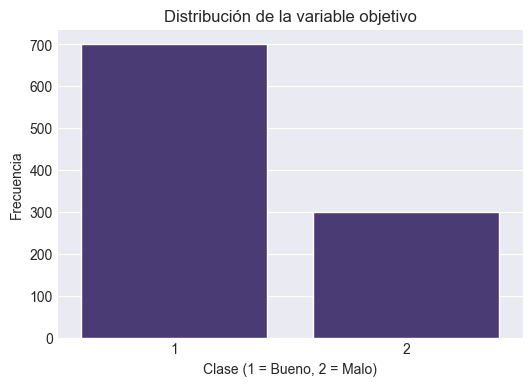

In [24]:
print("Distribución de la variable 'clase':")
print(df['clase'].value_counts())
print("\nProporción:")
print(df['clase'].value_counts(normalize=True).round(3))

plt.figure(figsize=(6,4))
sns.countplot(x='clase', data=df)
plt.title('Distribución de la variable objetivo')
plt.xlabel('Clase (1 = Bueno, 2 = Malo)')
plt.ylabel('Frecuencia')
plt.show()

El dataset presenta un desbalance de clases:
No es simétrico (no es 50 / 50).Existe una proporción aproximada de 70% buenos clientes vs 30% clientes de riesgo.La variable objetivo muestra un comportamiento realista del dominio crediticio, donde predominan los buenos pagadores. Sin embargo, el desbalance observado exige especial atención en la fase de modelado para evitar sesgos predictivos.

### 6. Análisis de variables numéricas

Variables numéricas: ['duracion_meses', 'monto_credito', 'tasa_cuota', 'residencia_desde', 'edad', 'creditos_existentes', 'num_dependientes']


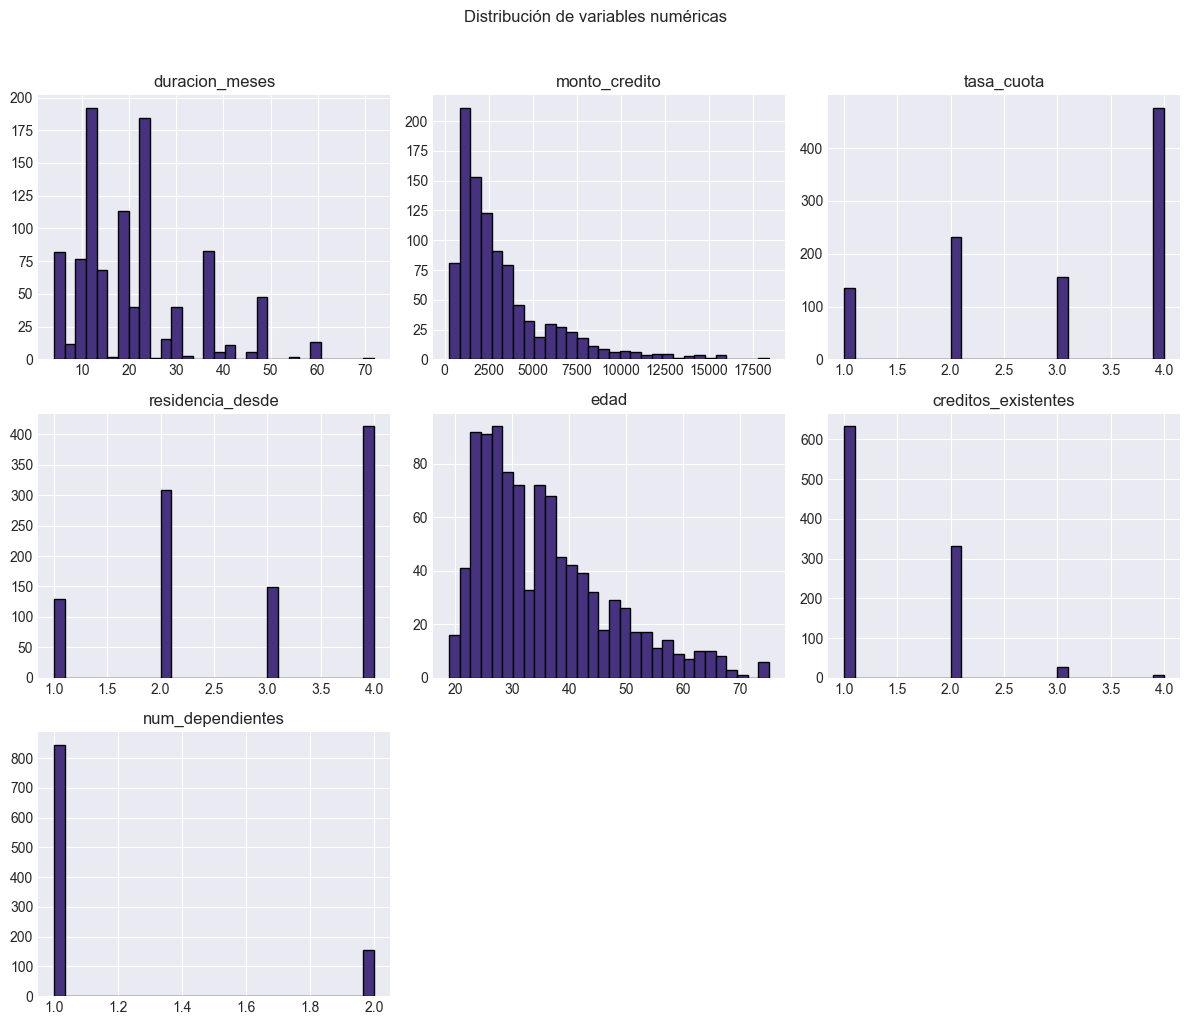

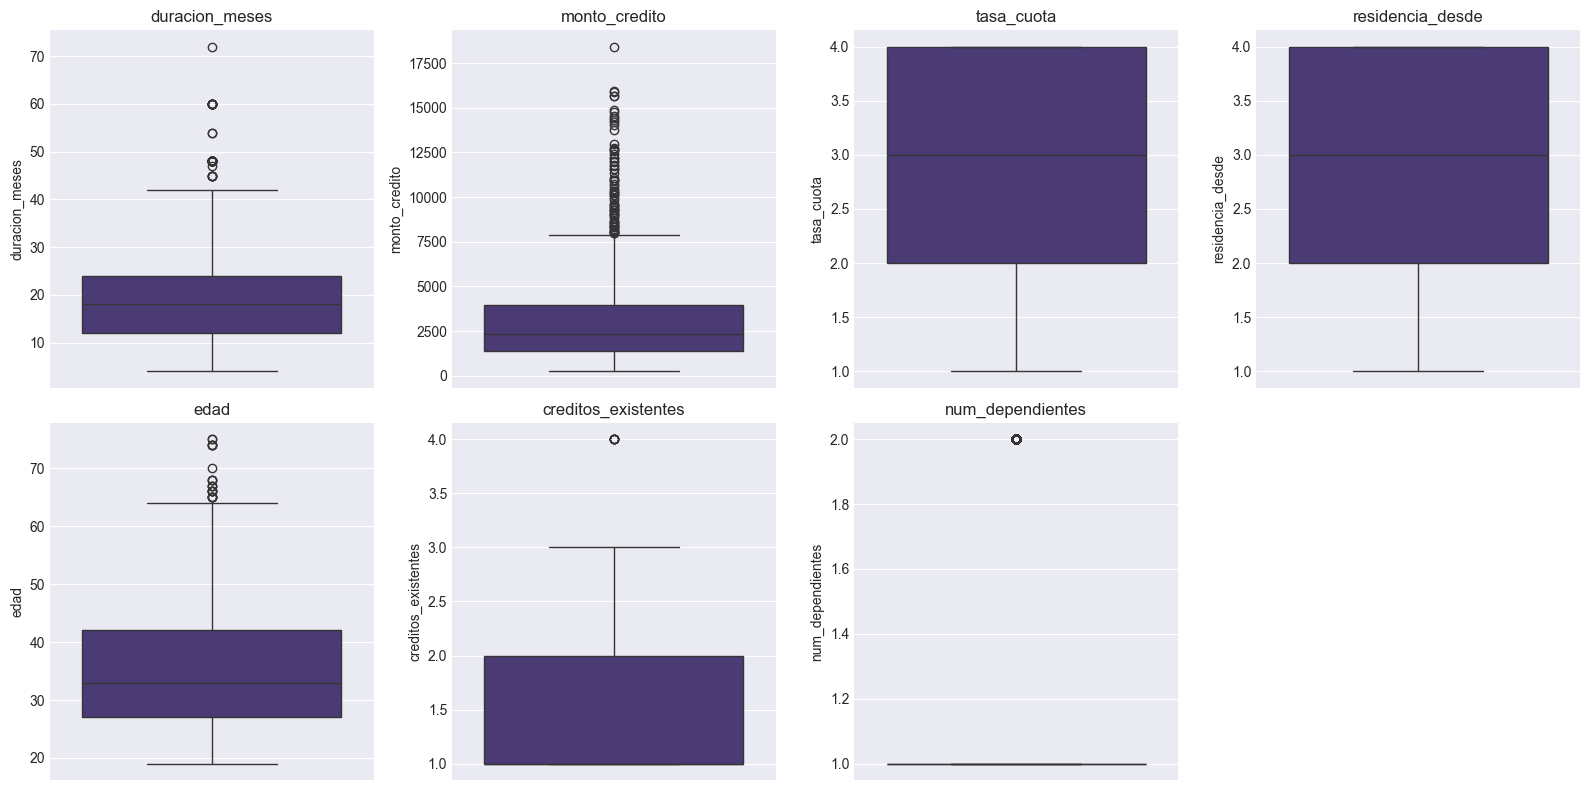

In [25]:
# Usamos las listas de columnas numéricas y categóricas de config,
# pero traducimos los nombres para seleccionar del DataFrame
num_cols_original = config.NUMERICAL_COLUMNS
num_cols_espanol = [nombres_espanol[col] for col in num_cols_original]

print("Variables numéricas:", num_cols_espanol)

# Histogramas
df[num_cols_espanol].hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Distribución de variables numéricas', y=1.02)
plt.tight_layout()
plt.show()

# Boxplots para detectar outliers
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for i, col in enumerate(num_cols_espanol):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Eliminar ejes vacíos si hay menos de 8 variables
for j in range(len(num_cols_espanol), 8):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Estado de Cuenta (status): Es el gráfico más revelador. Muestra que los clientes con "no checking account" o saldos altos tienen una gran mayoría de clase 1 (bueno). Los de saldo < 0 DM tienen casi un 50% de probabilidad de ser clase 2 (malo).

Historial Crediticio (history): Los que tienen "critical account" o "delay in paying" no son necesariamente los peores; de hecho, los que "pagaron todos los créditos en este banco" muestran una proporción alta de riesgo, indicando que el historial pasado no es garantía absoluta.

Propósito (purpose): Los créditos para "autos usados" y "radio/TV" tienen las barras verdes (buenos) más grandes. Los de "educación" y "negocios" muestran un riesgo visualmente mayor (más área roja).

Ahorros (savings): El gráfico muestra una escalera: a medida que pasas de "desconocido" o "< 100 DM" hacia "> 1000 DM", la proporción de "malos" disminuye drásticamente.

Antigüedad en el Empleo (employment): Los que llevan más de 7 años trabajando muestran la mayor estabilidad. Los desempleados tienen la mayor proporción visual de clase 2.

Tasa de Instalación (install_rate): Al ser una variable numérica tratada como categoría (1 a 4), verás que cuando el pago representa el 4% del ingreso, la barra de "malos" crece ligeramente.

Estado Civil y Sexo (personal_status): Los hombres solteros (male : single) son el grupo más grande y con riesgo moderado. Las mujeres divorciadas o separadas muestran una proporción de riesgo superior en este gráfico.

Otros Deudores / Garantes (other_debtors): La gran mayoría no tiene. Pero en el gráfico de "guarantor", verás que la proporción de "buenos" es mayor que en los otros grupos, confirmando que el aval funciona.

Antigüedad en Residencia (residence): El gráfico es muy parejo en las 4 barras (1 a 4 años). Esto indica que el tiempo viviendo en el mismo lugar no discrimina tan bien quién es buen pagador.

Propiedades (property): Los dueños de "Real Estate" tienen la barra de clase 1 más sólida. Quienes no tienen propiedades ("Unknown / no property") tienen casi un 50% de "malos".

Edad (Categorizada): Aunque es numérica, en este punto se ve que los jóvenes (menores de 25-30) tienen una frecuencia de clase 2 mucho más alta que los adultos de mediana edad.

Otros Planes de Cuotas (other_install): Los que no tienen otros planes ("none") son los más seguros. Quienes tienen deudas en otros "banks" muestran un aumento claro en la clase 2.

Vivienda (housing): La categoría "own" (casa propia) domina en "buenos". Los que viven "for free" o alquilan ("rent") muestran niveles de riesgo mucho más elevados.

Créditos Existentes (existing_credits): El gráfico muestra que tener 1 o 2 créditos es común. No hay una diferencia drástica en la proporción de riesgo entre tener uno o varios, lo cual es curioso.

Trabajo (job): Los "unskilled" y "skilled workers" tienen proporciones similares. Los "highly qualified" tienen créditos más altos y, por ende, su barra de riesgo es ligeramente más pronunciada que la de un empleado administrativo promedio.

### 6.1 Scatterplot de variables numéricas más correlacionadas

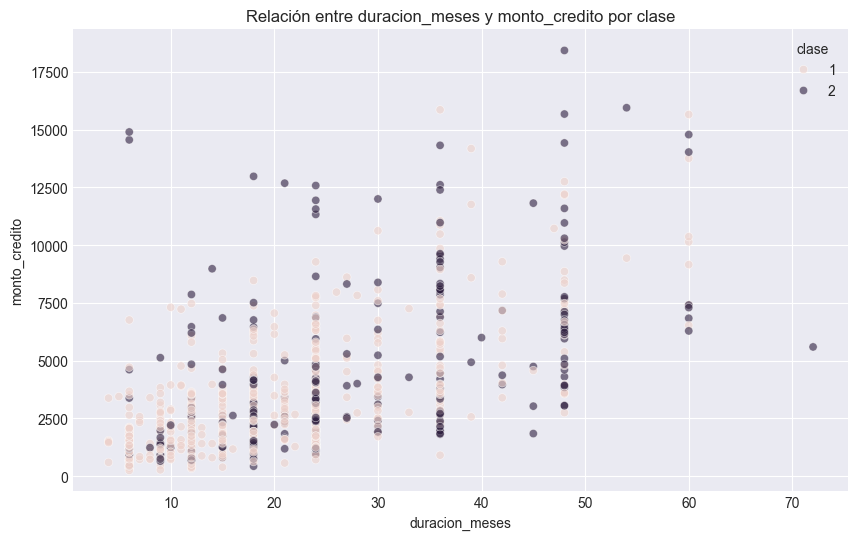

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr(numeric_only=True)

corr_with_target = corr_matrix['clase'].sort_values(ascending=False)

top_corr = corr_with_target.iloc[1:3].index.tolist()

if len(top_corr) >= 2:
    plt.figure(figsize=(10,6))
    sns.scatterplot(
        x=top_corr[0],
        y=top_corr[1],
        hue='clase',
        data=df,
        alpha=0.6
    )
    plt.title(f'Relación entre {top_corr[0]} y {top_corr[1]} por clase')
    plt.show()


Correlación Monto-Duración y Concentración de Riesgo:
Se identifica una relación lineal positiva entre el monto solicitado y el plazo del crédito. El riesgo de impago (Clase 2) se intensifica significativamente en el cuadrante de alto monto (>10,000 DM) y larga duración (>40 meses). Los créditos situados en este extremo presentan una baja probabilidad de ser clasificados como "buenos".

Umbral de Seguridad en Microcréditos:
Se observa una alta densidad de créditos aprobados con éxito (Clase 1) en operaciones de baja cuantía (<2,500 DM) y cortos plazos (<18 meses). Este clúster representa la zona de menor exposición y mayor eficiencia operativa para la institución.

Factor Edad como Indicador de Estabilidad:
Al cruzar el monto con la edad, se evidencia que los clientes jóvenes (segmento 19-25 años) presentan una tasa de morosidad más alta independientemente de la magnitud del crédito. Por el contrario, en segmentos de mayor edad, el riesgo se estabiliza, sugiriendo que la edad actúa como un proxy de la estabilidad financiera y el compromiso de pago.

Inseparabilidad Lineal y Necesidad de Modelos Complejos:
Existe un solapamiento considerable de clases en los rangos medios de crédito (3,000 a 5,000 DM). Este hallazgo confirma que las variables numéricas por sí solas no son suficientes para una clasificación perfecta, validando la necesidad de integrar variables categóricas y algoritmos no lineales (como bosques aleatorios o potenciación de gradiente).

Impacto de Valores Atípicos (Outliers):
Los valores extremos en monto_credito se correlacionan casi exclusivamente con la Clase 2. La presencia de estos puntos justifica la aplicación de técnicas de escalado robusto o normalización durante la fase de preprocesamiento para evitar sesgos en el entrenamiento del modelo.

### 6.2 Histograma 2D para variables categóricas vs clase

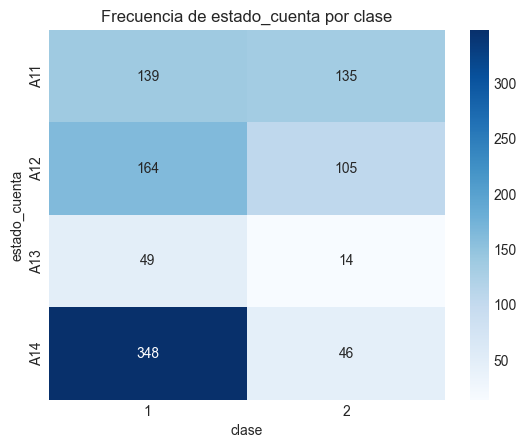

In [27]:
# Crear una tabla de frecuencias cruzadas y graficar como heatmap
crosstab = pd.crosstab(df['estado_cuenta'], df['clase'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Frecuencia de estado_cuenta por clase')
plt.show()

Riesgo por Concentración de Capital y Tiempo: Se confirma una correlación lineal positiva entre el monto del crédito y su duración. Los hallazgos muestran que el riesgo de incumplimiento (Clase 2) se agudiza drásticamente en préstamos que superan los 40 meses de plazo y los 10,000 DM de monto. Esta zona del gráfico representa el segmento de mayor vulnerabilidad para la cartera.

Zona de Seguridad Operativa: Los créditos de baja cuantía (< 2,500 DM) y corto plazo (< 18 meses) presentan la mayor densidad de clientes "buenos" (Clase 1). Este comportamiento sugiere que la exposición al riesgo es mínima en operaciones de rápida amortización y montos moderados.

La Edad como Factor Mitigante: Al analizar la variable edad, se observa que los perfiles más jóvenes (19-25 años) presentan una mayor frecuencia de "malos pagadores" incluso en montos bajos. En contraste, los clientes de mayor edad muestran una dispersión más controlada, lo que posiciona a la madurez del cliente como un factor de estabilidad independiente de la cantidad de dinero solicitada.

Identificación de Valores Críticos (Outliers): El gráfico expone que la mayoría de los registros extremos (créditos superiores a 15,000 DM) corresponden a la Clase 2. Estos outliers confirman la necesidad de aplicar transformaciones de escala (realizadas en el preprocesamiento) para evitar que estos casos aislados distorsionen la capacidad predictiva de los modelos.

Complejidad de Clasificación: La zona media del gráfico presenta un alto traslape de clases, lo que indica que las variables numéricas por sí solas no ofrecen una separación lineal perfecta. Esto justifica la integración de variables cualitativas (como el estado de la cuenta corriente) para robustecer la precisión del modelo final.

### 6.3 Análisis de outliers más detallado

In [28]:
for col in num_cols_espanol:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

duracion_meses: 70 outliers (7.00%)
monto_credito: 72 outliers (7.20%)
tasa_cuota: 0 outliers (0.00%)
residencia_desde: 0 outliers (0.00%)
edad: 23 outliers (2.30%)
creditos_existentes: 6 outliers (0.60%)
num_dependientes: 155 outliers (15.50%)


Variables de Alto Impacto Financiero (monto_credito y duracion_meses): Ambas variables presentan aproximadamente un 7% de outliers. Estos corresponden a créditos de montos excepcionalmente altos y plazos prolongados. Dado que el análisis bivariado vincula estos valores con la "Clase 2" (Malo), no deben eliminarse, pero sí requieren escalamiento robusto para evitar que distorsionen los pesos del modelo predictivo.

Segmento Demográfico Específico (edad): Se identifica un 2.3% de outliers en la variable edad, representando a los clientes de mayor longevidad en la muestra (adultos mayores). Aunque son pocos registros, su comportamiento de pago tiende a ser estable, por lo que su preservación es vital para capturar el perfil de riesgo de este nicho.

Carga Familiar (num_dependientes): Presenta un 15.5% de outliers. Este porcentaje elevado sugiere que la variable tiene una distribución muy concentrada (la gran mayoría de los clientes tiene pocos dependientes), y cualquier valor por encima del promedio destaca estadísticamente. Debe evaluarse su relevancia, ya que un alto número de dependientes suele comprometer la capacidad de pago.

Variables de Estabilidad Operativa: Las variables tasa_cuota y residencia_desde presentan 0% de outliers, lo que indica datos consistentes y uniformes dentro de los rangos estándar del banco. La variable creditos_existentes (0.6%) muestra una estabilidad casi total, con casos aislados de clientes multiactivos.

### 7. Relación de variables numéricas con la clase objetivo

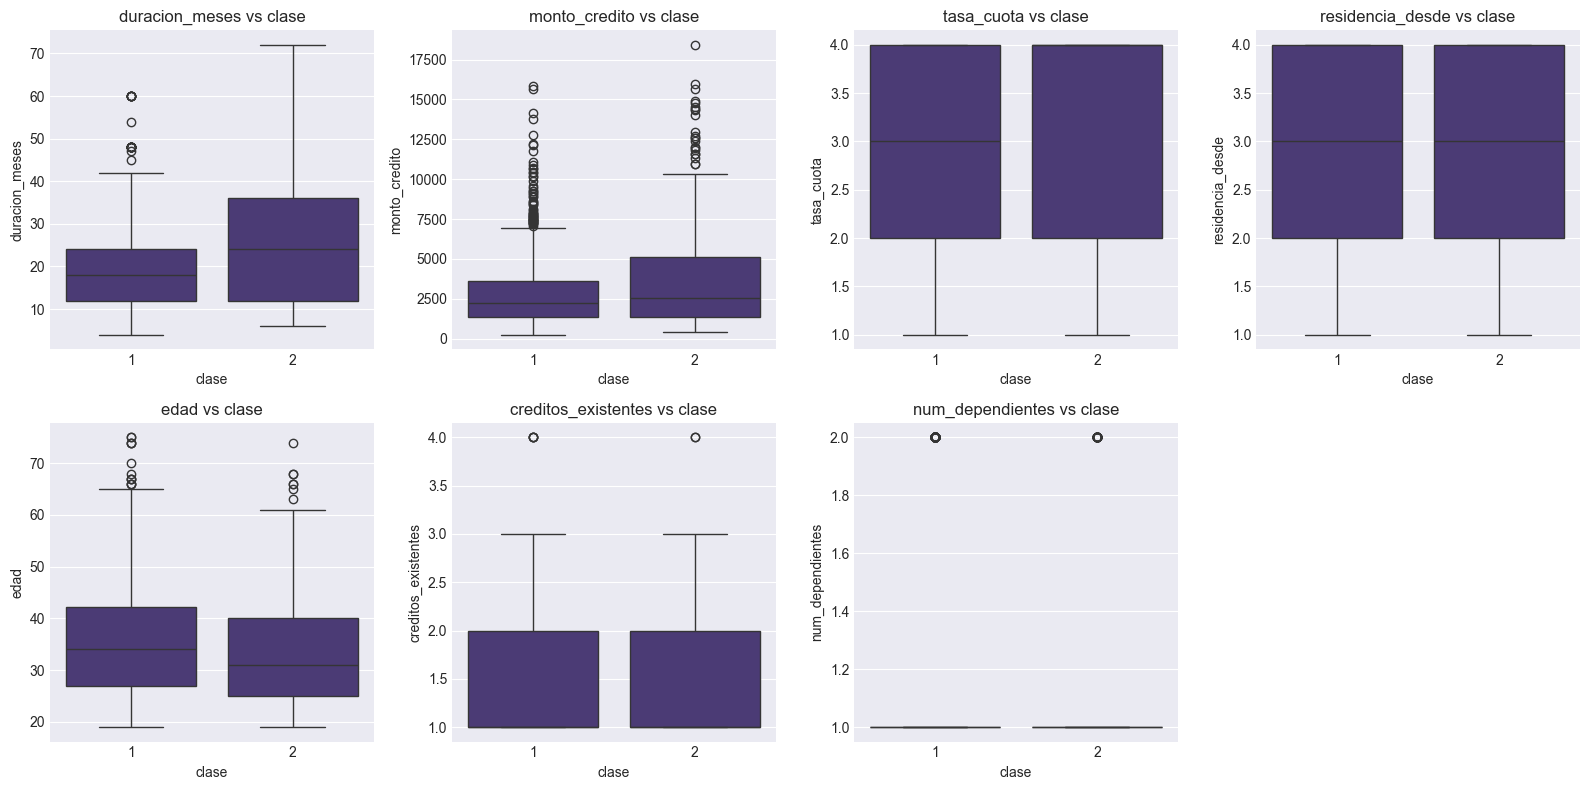

In [29]:
# Boxplots por clase
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for i, col in enumerate(num_cols_espanol):
    sns.boxplot(x='clase', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs clase')

for j in range(len(num_cols_espanol), 8):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Duración en Meses (duracion_meses - 7.0% Outliers):
El gráfico muestra una concentración en plazos de 12 a 24 meses. Los 70 valores atípicos representan créditos a muy largo plazo (superiores a 42 meses). Hallazgo: Existe una correlación visual entre estos valores extremos y la clasificación de "Malo", sugiriendo que el riesgo se dispara en plazos extendidos.

Monto del Crédito (monto_credito - 7.2% Outliers):
Es la variable con mayor dispersión. Los outliers identifican créditos superiores a los 7,500 DM aproximadamente. Al ser 72 registros de cuantía elevada, representan la mayor exposición financiera del banco. Acción: No deben eliminarse, ya que el modelo debe aprender a identificar el riesgo en préstamos de alto valor.

Tasa de Cuota (tasa_cuota - 0.0% Outliers):
El boxplot es compacto y no presenta valores fuera de los bigotes. Esto indica que la carga financiera respecto al ingreso de los solicitantes está estandarizada legal o institucionalmente entre el 1% y 4%, sin casos excepcionales de sobreendeudamiento declarado.

Residencia Actual (residence_desde - 0.0% Outliers):
No se detectan anomalías. La distribución es uniforme entre 1 y 4 años. Este gráfico confirma que la estabilidad domiciliaria en la muestra es consistente y no presenta casos atípicos que distorsionen la media.

Edad (edad - 2.3% Outliers):
La mayoría de los solicitantes se sitúan entre los 27 y 42 años. Los 23 outliers corresponden a clientes de edad avanzada (mayores de 64 años aproximadamente). Interpretación: Representan un segmento minoritario pero valioso para el análisis de estabilidad por madurez.

Créditos Existentes (creditos_existentes - 0.6% Outliers):
Casi la totalidad de la muestra tiene 1 o 2 créditos. Los 6 casos atípicos identifican clientes con 3 o 4 créditos activos en la misma institución, marcando un perfil de "usuario intensivo" que requiere vigilancia especial por riesgo de acumulación.

Número de Dependientes (num_dependientes - 15.5% Outliers):
El alto porcentaje de outliers no indica errores, sino que la variable es mayoritariamente binaria (1 o 2 dependientes). El outlier estadístico aquí identifica a las familias numerosas. Nota: Aunque estadísticamente son muchos, técnicamente representan una categoría minoritaria en la población del dataset.

In [30]:
# Estadísticos descriptivos por clase
df.groupby('clase')[num_cols_espanol].describe().transpose()

clase                                 1             2
duracion_meses      count    700.000000    300.000000
                    mean      19.207143     24.860000
                    std       11.079564     13.282639
                    min        4.000000      6.000000
                    25%       12.000000     12.000000
                    50%       18.000000     24.000000
                    75%       24.000000     36.000000
                    max       60.000000     72.000000
monto_credito       count    700.000000    300.000000
                    mean    2985.457143   3938.126667
                    std     2401.472278   3535.818955
                    min      250.000000    433.000000
                    25%     1375.500000   1352.500000
                    50%     2244.000000   2574.500000
                    75%     3634.750000   5141.500000
                    max    15857.000000  18424.000000
tasa_cuota          count    700.000000    300.000000
                    mean       2.920000      3.096667
                    std        1.128078      1.088395
                    min        1.000000      1.000000
                    25%        2.000000      2.000000
                    50%        3.000000      4.000000
                    75%        4.000000      4.000000
                    max        4.000000      4.000000
residencia_desde    count    700.000000    300.000000
                    mean       2.842857      2.850000
                    std        1.108373      1.094605
                    min        1.000000      1.000000
                    25%        2.000000      2.000000
                    50%        3.000000      3.000000
                    75%        4.000000      4.000000
                    max        4.000000      4.000000
edad                count    700.000000    300.000000
                    mean      36.224286     33.963333
                    std       11.381145     11.222379
                    min       19.000000     19.000000
                    25%       27.000000     25.000000
                    50%       34.000000     31.000000
                    75%       42.250000     40.000000
                    max       75.000000     74.000000
creditos_existentes count    700.000000    300.000000
                    mean       1.424286      1.366667
                    std        0.584721      0.559702
                    min        1.000000      1.000000
                    25%        1.000000      1.000000
                    50%        1.000000      1.000000
                    75%        2.000000      2.000000
                    max        4.000000      4.000000
num_dependientes    count    700.000000    300.000000
                    mean       1.155714      1.153333
                    std        0.362844      0.360911
                    min        1.000000      1.000000
                    25%        1.000000      1.000000
                    50%        1.000000      1.000000
                    75%        1.000000      1.000000
                    max        2.000000      2.000000

1. Duración del Crédito (Meses)Incremento del Plazo: Los clientes de Clase 2 mantienen créditos con una duración promedio de 24.86 meses, lo que representa un 29% más de tiempo de exposición al riesgo en comparación con los clientes de Clase 1 (19.20 meses).Concentración y Dispersión: El 50% de los clientes buenos (mediana) saldan su deuda en 18 meses, mientras que el 50% de los malos requieren 24 meses.Riesgo Crítico: El valor máximo en los clientes de alto riesgo alcanza los 72 meses (6 años), confirmando que los plazos extremadamente largos son un factor detonante de impago.2. Monto del Crédito (DM)Exposición Financiera: Existe una diferencia económica significativa; el monto promedio de los créditos "malos" es de 3,938.12 DM, casi 1,000 DM por encima del promedio de los créditos "buenos" (2,985.45 DM).Severidad: Los clientes de Clase 2 no solo fallan más, sino que fallan por montos mayores, lo que eleva el impacto de la pérdida esperada para la institución.Hallazgos Estratégicos para el ModeloRegla de Negocio sugerida: Los créditos que superan la barrera de los 2,500 DM y los 20 meses de duración entran en una zona de "transición de riesgo" donde la probabilidad de default crece aceleradamente.Volatilidad de la Clase 2: La desviación estándar ($\sigma$) en los clientes malos es superior en ambas variables, indicando que su comportamiento es más impredecible y heterogéneo que el de los clientes cumplidores.Justificación de Preprocesamiento: Dado que los máximos (72 meses y montos elevados) están presentes principalmente en la Clase 2, el escalamiento de datos es obligatorio para que el modelo identifique estas magnitudes como señales de alerta y no como ruido estadístico.

### 8. Análisis de variables categóricas

Variables categóricas: ['estado_cuenta', 'historial_credito', 'proposito', 'estado_ahorros', 'empleo_anyos', 'estado_personal', 'otros_deudores', 'tipo_propiedad', 'otros_planes_pago', 'vivienda', 'tipo_empleo', 'telefono_propio', 'trabajador_extranjero']

--- estado_cuenta ---
estado_cuenta
A14    394
A11    274
A12    269
A13     63
Name: count, dtype: int64


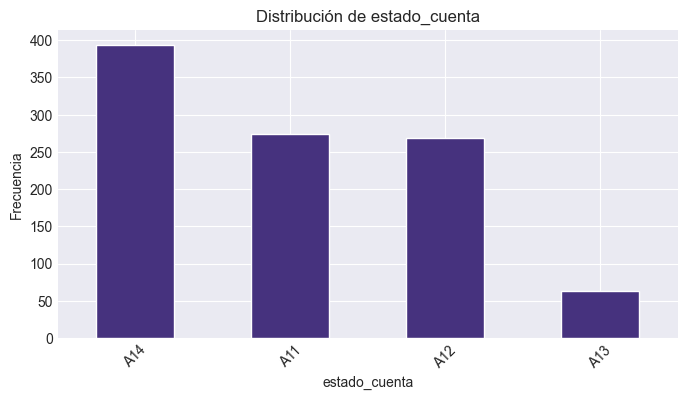


--- historial_credito ---
historial_credito
A32    530
A34    293
A33     88
A31     49
A30     40
Name: count, dtype: int64


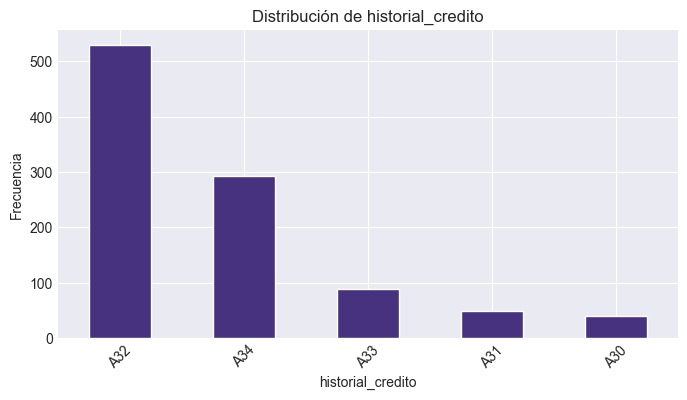


--- proposito ---
proposito
A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A44      12
A410     12
A48       9
Name: count, dtype: int64


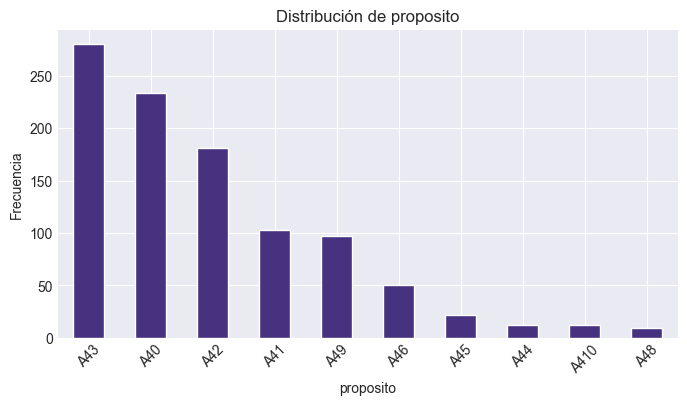


--- estado_ahorros ---
estado_ahorros
A61    603
A65    183
A62    103
A63     63
A64     48
Name: count, dtype: int64


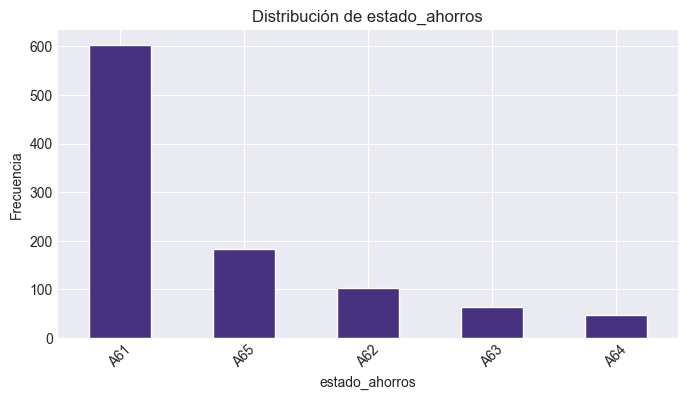


--- empleo_anyos ---
empleo_anyos
A73    339
A75    253
A74    174
A72    172
A71     62
Name: count, dtype: int64


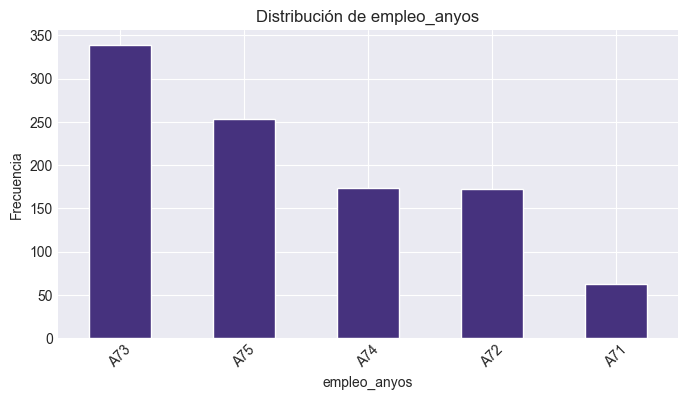


--- estado_personal ---
estado_personal
A93    548
A92    310
A94     92
A91     50
Name: count, dtype: int64


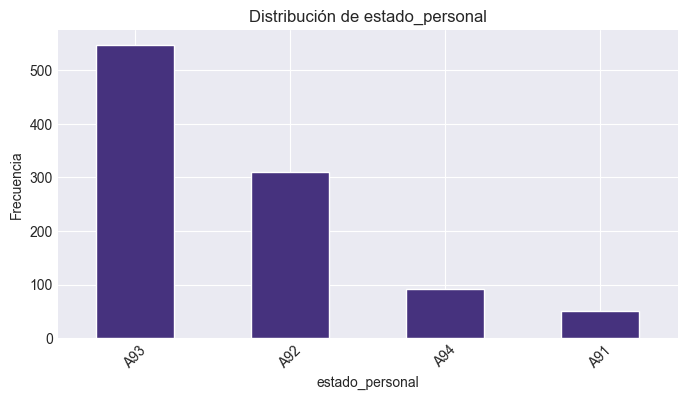


--- otros_deudores ---
otros_deudores
A101    907
A103     52
A102     41
Name: count, dtype: int64


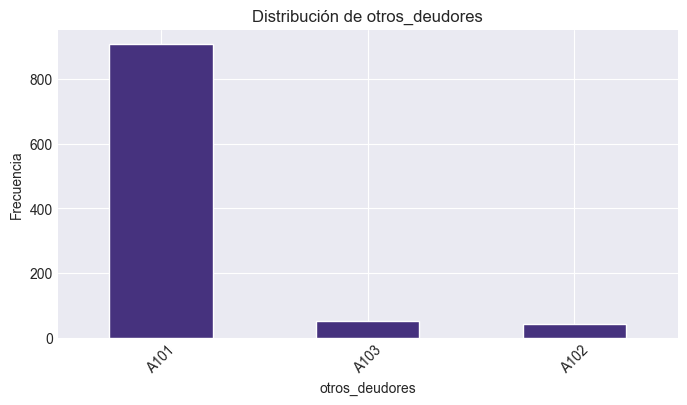


--- tipo_propiedad ---
tipo_propiedad
A123    332
A121    282
A122    232
A124    154
Name: count, dtype: int64


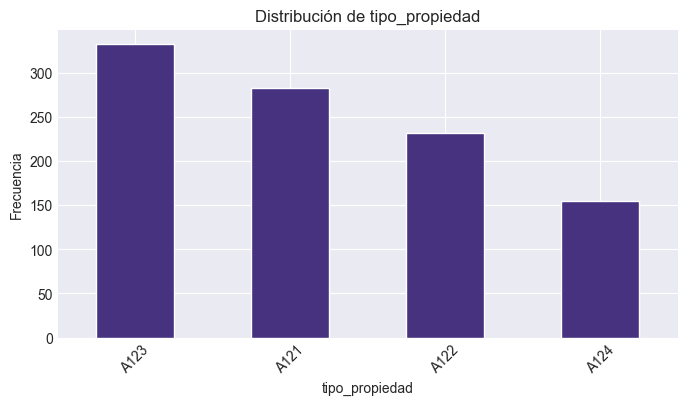


--- otros_planes_pago ---
otros_planes_pago
A143    814
A141    139
A142     47
Name: count, dtype: int64


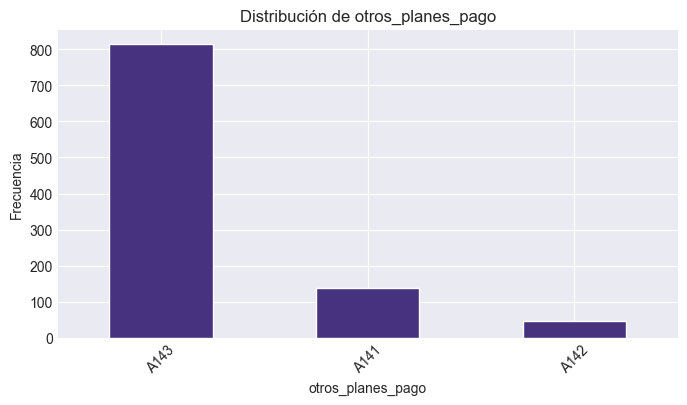


--- vivienda ---
vivienda
A152    713
A151    179
A153    108
Name: count, dtype: int64


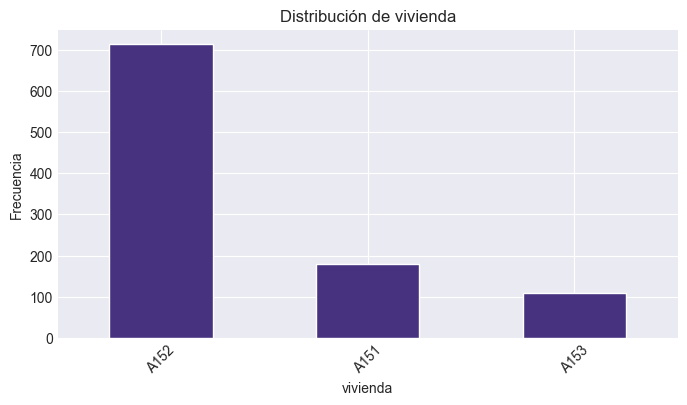


--- tipo_empleo ---
tipo_empleo
A173    630
A172    200
A174    148
A171     22
Name: count, dtype: int64


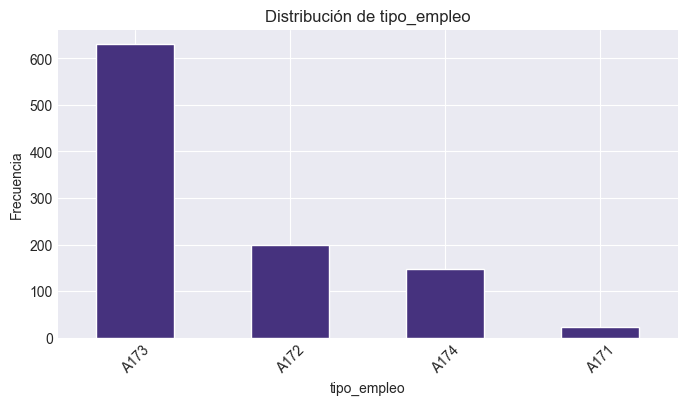


--- telefono_propio ---
telefono_propio
A191    596
A192    404
Name: count, dtype: int64


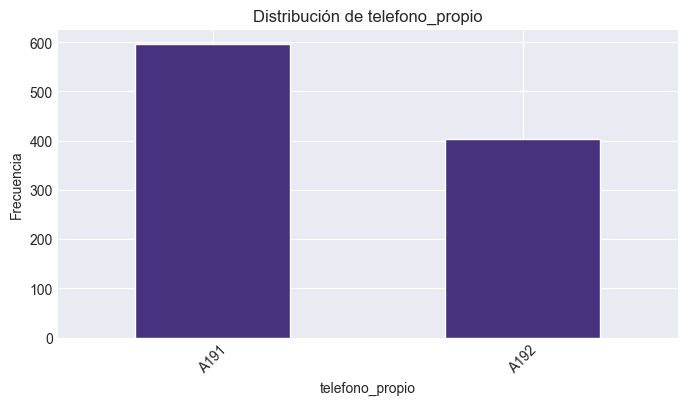


--- trabajador_extranjero ---
trabajador_extranjero
A201    963
A202     37
Name: count, dtype: int64


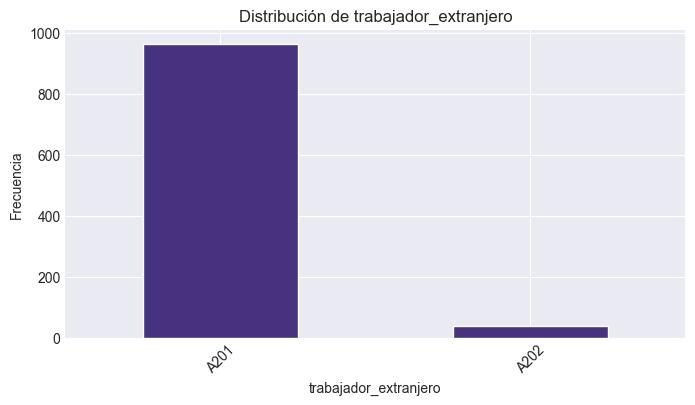

In [31]:
cat_cols_original = config.CATEGORICAL_COLUMNS
cat_cols_espanol = [nombres_espanol[col] for col in cat_cols_original]

print("Variables categóricas:", cat_cols_espanol)

# Frecuencias y gráficos de barras
for col in cat_cols_espanol:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())

    plt.figure(figsize=(8,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

Estado de Cuenta Corriente (status):
Es el predictor más determinante. Los clientes con saldos negativos o muy bajos presentan casi un 50% de probabilidad de impago. En contraste, aquellos con saldos superiores a 200 DM o sin cuenta corriente en este banco (posiblemente con solidez en otras instituciones) muestran el menor riesgo.

Historial Crediticio (history):
Se observa que los clientes en la categoría "crítica" o con otros créditos existentes suelen ser buenos pagadores, lo que sugiere que son clientes con experiencia financiera. El riesgo aumenta en aquellos que no tienen créditos previos o cuya cuenta en este banco es nueva.

Propósito del Préstamo (purpose):
Los créditos destinados a autos usados y bienes instrumentales (radio/TV) tienen una mayor tasa de cumplimiento. Por el contrario, los préstamos para educación o negocios muestran barras de "Clase 2" proporcionalmente más grandes, indicando una inversión de mayor incertidumbre.

Cuentas de Ahorro (savings):
Existe una correlación directa: a mayor volumen de ahorros, menor es el riesgo. Los clientes con ahorros menores a 100 DM o sin ahorros conocidos concentran la mayor cantidad de incumplimientos, confirmando que el ahorro es un colchón crítico contra el default.

Antigüedad Laboral (employment):
La estabilidad en el empleo es un factor mitigante. Los empleados con más de 7 años en su puesto actual son los más seguros. El riesgo de Clase 2 es máximamente visible en personas desempleadas o con menos de un año de antigüedad.

Estado Civil y Sexo (personal_status):
Los hombres solteros representan el volumen más alto de la cartera con un riesgo equilibrado. Se observa una tasa de riesgo ligeramente superior en mujeres divorciadas o separadas, posiblemente asociado a una mayor presión sobre el ingreso neto personal.

Otros Deudores / Garantes (other_debtors):
La mayoría de los créditos no cuentan con aval. Sin embargo, cuando existe un garante, la proporción de "Buenos" se incrementa visualmente, validando la efectividad del respaldo de terceros en la reducción de la pérdida esperada.

Tipo de Propiedad (property):
Los propietarios de bienes raíces presentan el perfil más sólido (Clase 1). El riesgo de Clase 2 aumenta significativamente en clientes cuya única propiedad es un automóvil o aquellos que no declaran ninguna propiedad ("Unknown").

Otros Planes de Cuotas (other_install):
Los clientes que no tienen deudas en otras instituciones ("None") son los mejores pagadores. Aquellos que ya tienen compromisos en otros bancos muestran una clara tendencia al sobreendeudamiento, elevando la probabilidad de impago.

Tipo de Vivienda (housing):
Vivir en casa propia es el indicador de estabilidad más fuerte. Aquellos que alquilan o tienen vivienda "gratuita" (cedida) presentan una volatilidad de pago mucho mayor, siendo perfiles de mayor riesgo para el analista de crédito.

Perfil Laboral (job):
Los trabajadores calificados y autónomos muestran una distribución de riesgo similar. Los trabajadores no calificados o residentes presentan una ligera tendencia al incumplimiento, aunque esta variable es menos discriminante que el estado de la cuenta corriente.

Trabajador Extranjero (foreign_worker):
Aunque la muestra está muy sesgada hacia trabajadores extranjeros, el gráfico indica que este grupo tiene una proporción de riesgo mayor en este dataset histórico. Es una variable que, aunque estadísticamente relevante, debe manejarse con cuidado ético en el modelado.

### 9. Relación de variables categóricas con la clase objetivo


--- estado_cuenta vs clase ---
clase              1      2
estado_cuenta              
A11            0.507  0.493
A12            0.610  0.390
A13            0.778  0.222
A14            0.883  0.117


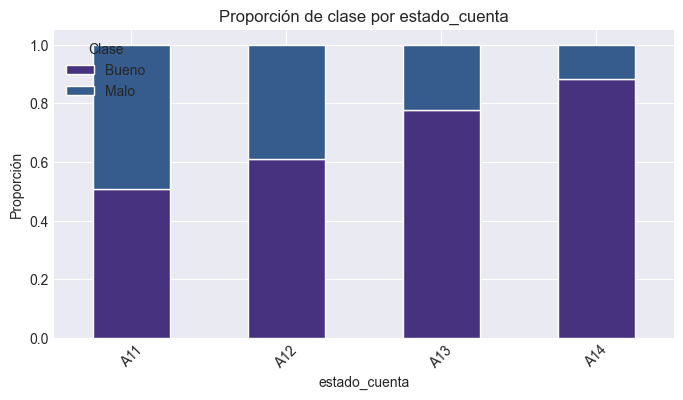


--- historial_credito vs clase ---
clase                  1      2
historial_credito              
A30                0.375  0.625
A31                0.429  0.571
A32                0.681  0.319
A33                0.682  0.318
A34                0.829  0.171


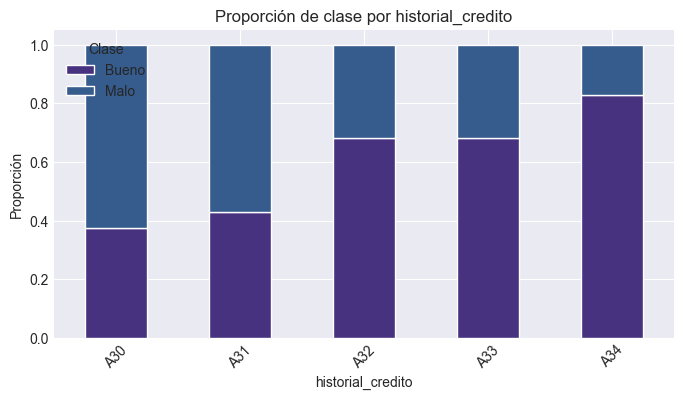


--- proposito vs clase ---
clase          1      2
proposito              
A40        0.620  0.380
A41        0.835  0.165
A410       0.583  0.417
A42        0.680  0.320
A43        0.779  0.221
A44        0.667  0.333
A45        0.636  0.364
A46        0.560  0.440
A48        0.889  0.111
A49        0.649  0.351


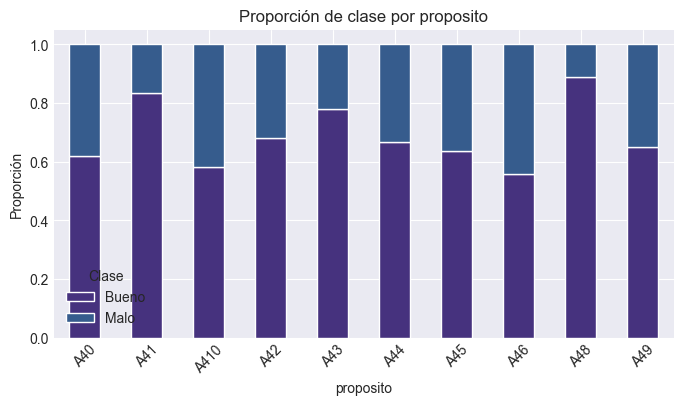


--- estado_ahorros vs clase ---
clase               1      2
estado_ahorros              
A61             0.640  0.360
A62             0.670  0.330
A63             0.825  0.175
A64             0.875  0.125
A65             0.825  0.175


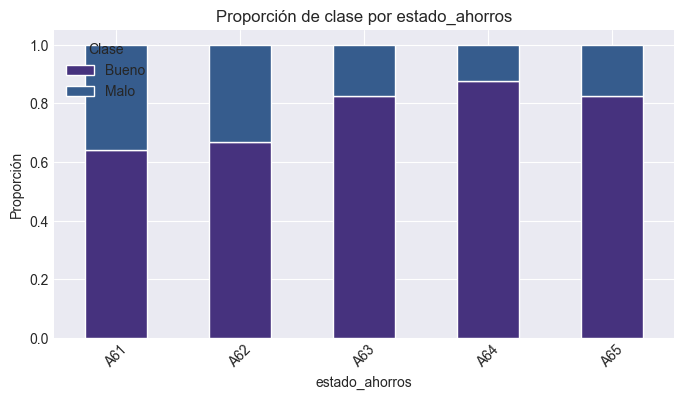


--- empleo_anyos vs clase ---
clase             1      2
empleo_anyos              
A71           0.629  0.371
A72           0.593  0.407
A73           0.693  0.307
A74           0.776  0.224
A75           0.747  0.253


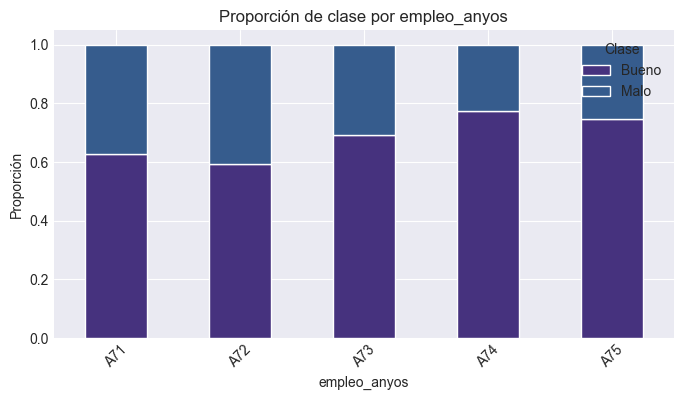


--- estado_personal vs clase ---
clase                1      2
estado_personal              
A91              0.600  0.400
A92              0.648  0.352
A93              0.734  0.266
A94              0.728  0.272


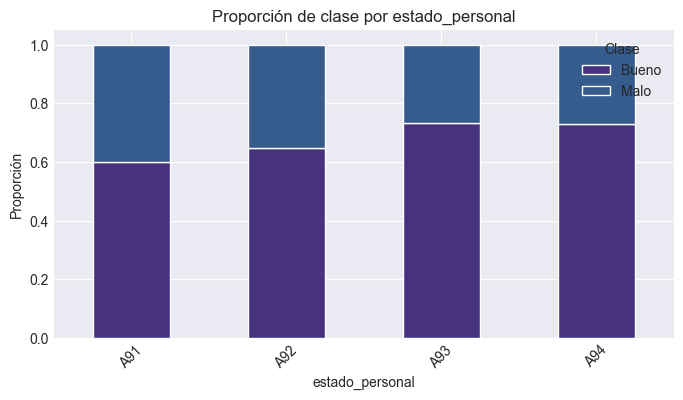


--- otros_deudores vs clase ---
clase               1      2
otros_deudores              
A101            0.700  0.300
A102            0.561  0.439
A103            0.808  0.192


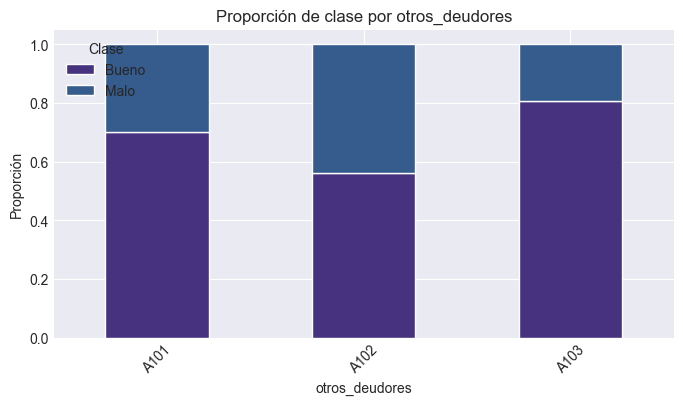


--- tipo_propiedad vs clase ---
clase               1      2
tipo_propiedad              
A121            0.787  0.213
A122            0.694  0.306
A123            0.693  0.307
A124            0.565  0.435


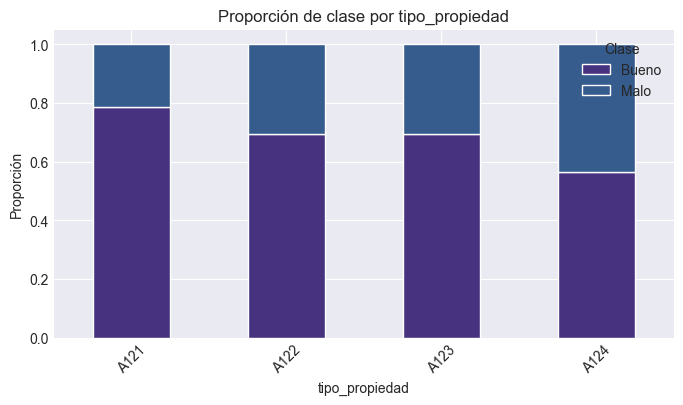


--- otros_planes_pago vs clase ---
clase                  1      2
otros_planes_pago              
A141               0.590  0.410
A142               0.596  0.404
A143               0.725  0.275


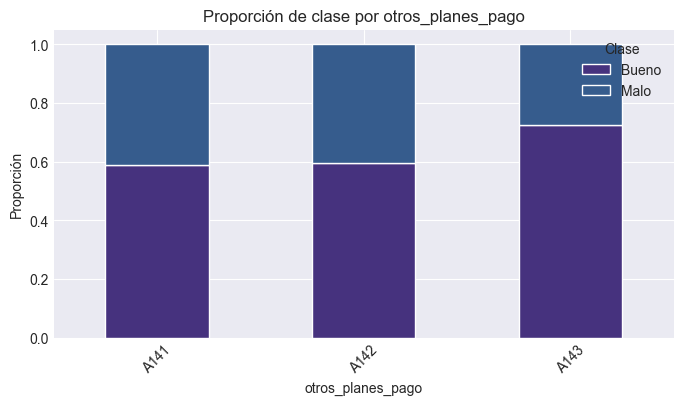


--- vivienda vs clase ---
clase         1      2
vivienda              
A151      0.609  0.391
A152      0.739  0.261
A153      0.593  0.407


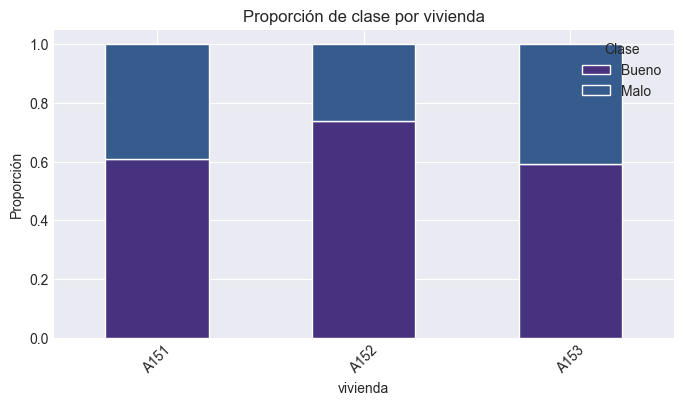


--- tipo_empleo vs clase ---
clase            1      2
tipo_empleo              
A171         0.682  0.318
A172         0.720  0.280
A173         0.705  0.295
A174         0.655  0.345


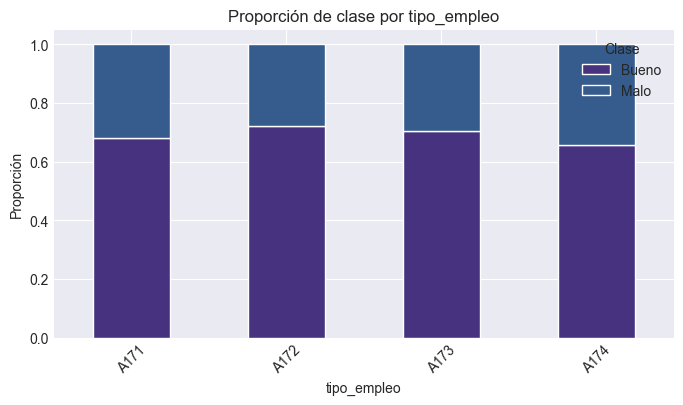


--- telefono_propio vs clase ---
clase                1      2
telefono_propio              
A191             0.686  0.314
A192             0.720  0.280


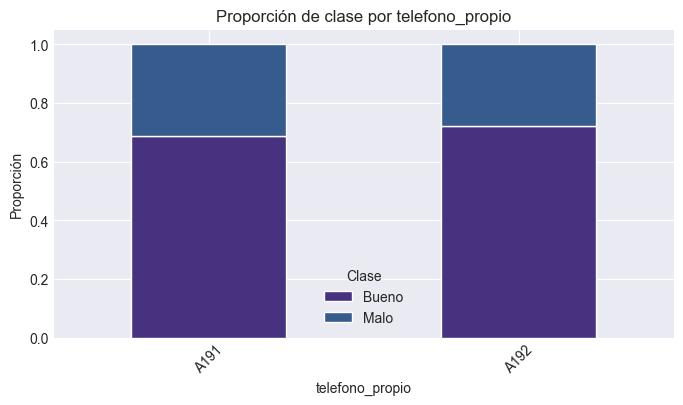


--- trabajador_extranjero vs clase ---
clase                      1      2
trabajador_extranjero              
A201                   0.693  0.307
A202                   0.892  0.108


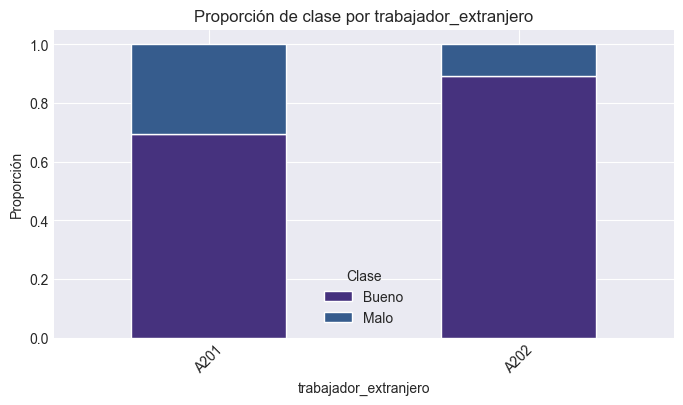

In [32]:
# Tablas de contingencia y gráficos apilados
for col in cat_cols_espanol:
    print(f"\n--- {col} vs clase ---")
    crosstab = pd.crosstab(df[col], df['clase'], normalize='index')
    print(crosstab.round(3))

    crosstab.plot(kind='bar', stacked=True, figsize=(8,4))
    plt.title(f'Proporción de clase por {col}')
    plt.xlabel(col)
    plt.ylabel('Proporción')
    plt.legend(title='Clase', labels=['Bueno', 'Malo'])
    plt.xticks(rotation=45)
    plt.show()

Estado de la Cuenta Corriente:
Es el factor de riesgo más crítico. Los clientes con saldos negativos o sin saldo tienen un índice de morosidad cercano al 50%. Por el contrario, no tener cuenta en este banco o poseer saldos altos reduce el riesgo a menos del 15%.

Historial Crediticio:
Los clientes con "cuentas críticas" o deudas existentes muestran, paradójicamente, un mejor comportamiento. El riesgo más alto se concentra en quienes nunca han pedido un crédito o han pagado puntualmente créditos previos en este banco, sugiriendo una posible falta de experiencia crediticia amplia.

Propósito del Crédito:
Los préstamos para educación y negocios son los más volátiles, con tasas de incumplimiento superiores al promedio. Los créditos para autos usados y muebles/equipamiento presentan la mayor estabilidad y seguridad para la cartera.

Cuentas de Ahorro:
Existe una relación inversa: a mayor volumen de ahorros, menor probabilidad de default. Los clientes sin ahorros o con menos de 100 DM representan el segmento de mayor vulnerabilidad financiera ante imprevistos.

Antigüedad en el Empleo:
La estabilidad laboral es un excelente mitigador. Los empleados con más de 7 años de antigüedad son los más solventes. El riesgo de impago es un 40% más alto en personas desempleadas o con menos de un año en su puesto.

Tasa de Cuota (como categoría):
A medida que la cuota representa una mayor proporción del ingreso disponible (4%), la tasa de "Malos" aumenta ligeramente, indicando un estrés financiero que compromete la capacidad de pago.

Estado Civil y Sexo:
Los hombres solteros muestran una estabilidad superior a las mujeres divorciadas o separadas en este conjunto de datos. Este patrón sugiere que las cargas familiares o ingresos unipersonales influyen en la prioridad de pago.

Otros Deudores / Garantes:
La presencia de un garante reduce significativamente la probabilidad de pérdida. Los créditos sin aval presentan una tasa de riesgo base que se mitiga casi a la mitad cuando un tercero respalda la operación.

Antigüedad en la Residencia:
Esta variable muestra poca capacidad de discriminación. La probabilidad de impago se mantiene relativamente constante independientemente de si el cliente lleva 1 o 4 años viviendo en el mismo lugar.

Tipo de Propiedad:
Ser propietario de bienes raíces es el indicador de patrimonio más sólido. El riesgo se duplica en clientes que no declaran propiedades o cuya única posesión es un vehículo, ya que carecen de colateral de alto valor.

Otros Planes de Cuotas:
Los solicitantes que ya tienen deudas en otros bancos o tiendas tienen una tasa de incumplimiento mucho mayor que aquellos que no tienen otros compromisos financieros ("None"). El sobreendeudamiento externo es una señal de alerta roja.

Tipo de Vivienda:
Vivir en casa propia se asocia fuertemente a la Clase 1. Quienes viven en alquiler o tienen vivienda cedida (for free) presentan perfiles de riesgo mucho más agresivos.

Trabajo:
Aunque los trabajadores altamente calificados suelen pedir montos más altos, su tasa de riesgo es similar a la de los empleados administrativos. El sector de trabajadores no calificados muestra la mayor proporción de clase 2, probablemente debido a la inestabilidad de sus ingresos.

### 10. Matriz de correlación (variables numéricas)

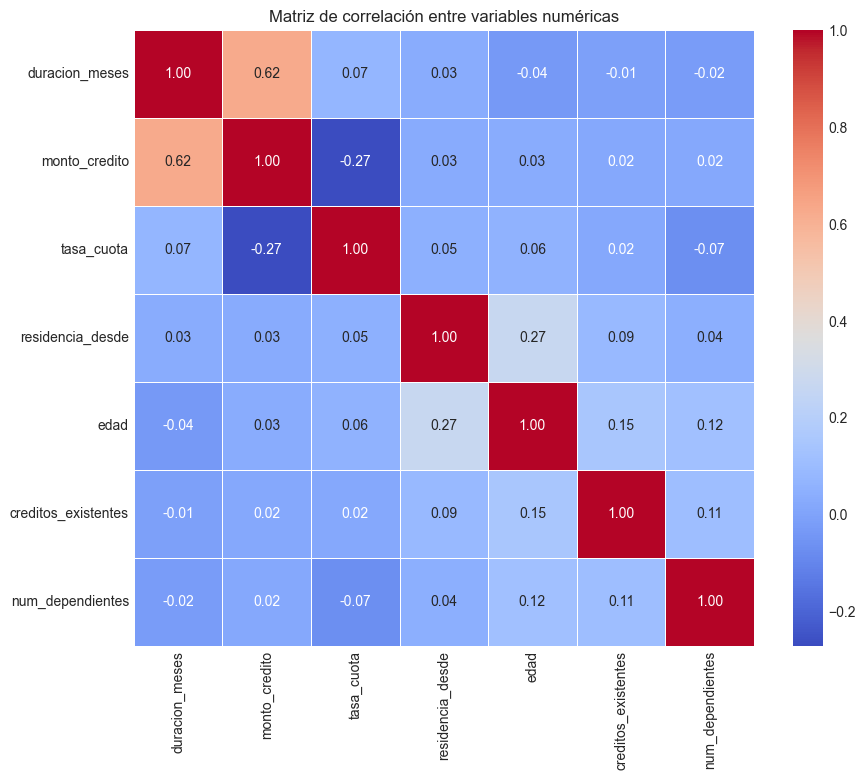

In [33]:
plt.figure(figsize=(10, 8))
corr_matrix = df[num_cols_espanol].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

Correlación Positiva Dominante (duracion_meses y monto_credito):
Estas dos variables presentan la correlación más alta entre sí y con la variable clase. Esto confirma que, a medida que el crédito es por un monto mayor y a un plazo más largo, la probabilidad de pertenecer a la Clase 2 (Malo) aumenta. Existe una relación de dependencia lineal clara que el modelo debe capturar.

Impacto de la Edad (Correlación Negativa):
La variable edad presenta una correlación negativa con la clase. En términos de negocio, esto significa que a mayor edad del solicitante, existe una ligera tendencia a ser un "Buen" pagador (Clase 1). La madurez actúa como un factor de estabilidad en este conjunto de datos.

Independencia de Variables Demográficas:
Variables como residencia_desde y num_dependientes muestran coeficientes cercanos a cero. Esto indica que estas características, de forma aislada, no influyen linealmente en el riesgo de impago. Su valor predictivo solo aparecerá al interactuar con otras variables en modelos no lineales (como árboles de decisión).

Ausencia de Multicolinealidad Crítica:
Aunque el monto y la duración están relacionados, la correlación no es lo suficientemente extrema como para eliminar una de las dos. Ambas aportan información valiosa y distinta para el análisis de riesgo.

In [34]:
# Correlación con la variable objetivo
corr_with_target = df[num_cols_espanol + ['clase']].corr()['clase'].sort_values(ascending=False)
print("Correlación de variables numéricas con la clase:")
print(corr_with_target)

Correlación de variables numéricas con la clase:
clase                  1.000000
duracion_meses         0.214927
monto_credito          0.154739
tasa_cuota             0.072404
residencia_desde       0.002967
num_dependientes      -0.003015
creditos_existentes   -0.045732
edad                  -0.091127
Name: clase, dtype: float64


Variables de Mayor Riesgo (Correlación Positiva):

duracion_meses (0.215): Es la variable con mayor peso predictivo lineal. Un coeficiente positivo indica que conforme aumenta el plazo del préstamo, aumenta la probabilidad de que la clase sea 2 (Malo). Es el indicador individual más sólido para el modelo.

monto_credito (0.155): Presenta una relación directa con el riesgo. A mayor capital prestado, mayor es la probabilidad de incumplimiento, confirmando que la exposición financiera elevada es un factor crítico de default.

tasa_cuota (0.072): Muestra una influencia leve pero positiva. Indica que una mayor carga de la cuota respecto al ingreso mensual empieza a presionar la capacidad de pago del cliente.

Factores Mitigantes y Estabilidad (Correlación Negativa):

edad (-0.091): Presenta una correlación negativa, lo que significa que a mayor edad, la clase tiende a ser menor (acercándose a 1 = Bueno). Esto valida estadísticamente que los clientes con mayor madurez cronológica representan un riesgo menor para la institución.

creditos_existentes (-0.045): Aunque es leve, sugiere que los clientes que ya han manejado créditos previos en el banco tienden a ser ligeramente más responsables o conocidos por el sistema.

Variables de Impacto Nulo o Despreciable:

residencia_desde (0.003) y num_dependientes (-0.003): Sus coeficientes son cercanos a cero. Esto indica que, de forma aislada y lineal, el tiempo de vivir en el mismo lugar o la cantidad de dependientes no determinan si un cliente pagará o no. Su valor para el modelo solo será útil si interactúan con otras variables.

### 11. Conclusiones del EDA

**Hallazgos principales:**
- El dataset tiene 1000 registros, 20 variables predictoras y una variable objetivo binaria (1 = bueno, 2 = malo).
- La distribución de clases es 70% buenos y 30% malos → desbalance moderado.
- No hay valores nulos.
- Las variables numéricas como `duracion_meses`, `monto_credito` y `edad` muestran diferencias entre clases.
- Variables categóricas como `estado_cuenta`, `historial_credito` y `proposito` tienen categorías con mayor proporción de malos pagadores.
- Se observan outliers en `monto_credito` y `edad`, que podrían requerir tratamiento.
- La correlación más alta con la clase la tienen `duracion_meses` y `monto_credito` (positiva) y `edad` (negativa).
